In [1]:
### Social Recognition Data Analysis ###

# Import the dataset
import pandas as pd
soc_rec = pd.read_csv("./soc_rec_dataset.csv") 


In [2]:
# Clean up the dataset

rows_to_drop = [48, 49, 50, 51]
soc_rec_clean = soc_rec.drop(rows_to_drop, axis=0, errors='ignore') # remove empty rows

columns_to_drop = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 11', 'Latency (female 1)', 'Duration (female 1)']
soc_rec_clean = soc_rec_clean.drop(columns_to_drop, axis=1, errors='ignore') # remove empty & unnecessary columns

soc_rec_clean = soc_rec_clean.rename(columns={
    "Individual no.": "ID",
    "Latency (approach novel mouse)": "Latency_Novel",
    "Duration (exploration - novel mouse)": "Duration_Novel",
    "Latency (approach familiar mouse)": "Latency_Familiar",
    "Duration (exploration - familiar mouse)": "Duration_Familiar" 
}) # rename columns for clarity

soc_rec_clean = soc_rec_clean.set_index("ID") # set index as animal IDs

soc_rec_clean # verify changes

,Species,Population,Latency_Novel,Duration_Novel,Latency_Familiar,Duration_Familiar
ID,,,,,,
1,R. pumilio,Goegap,10.0,51.20,5.0,61.00
2,R. pumilio,Goegap,3.0,43.20,11.0,41.13
3,R. pumilio,Goegap,4.0,53.40,3.0,33.50
4,R. pumilio,Goegap,3.0,53.40,4.0,62.30
5,R. pumilio,Goegap,2.0,44.50,3.0,63.50
6,R. pumilio,Goegap,3.0,59.20,5.0,103.20
7,R. pumilio,Goegap,4.0,62.30,4.0,63.50
8,R. pumilio,Goegap,5.0,54.20,6.0,92.10
9,R. pumilio,Goegap,3.0,59.30,5.0,60.30


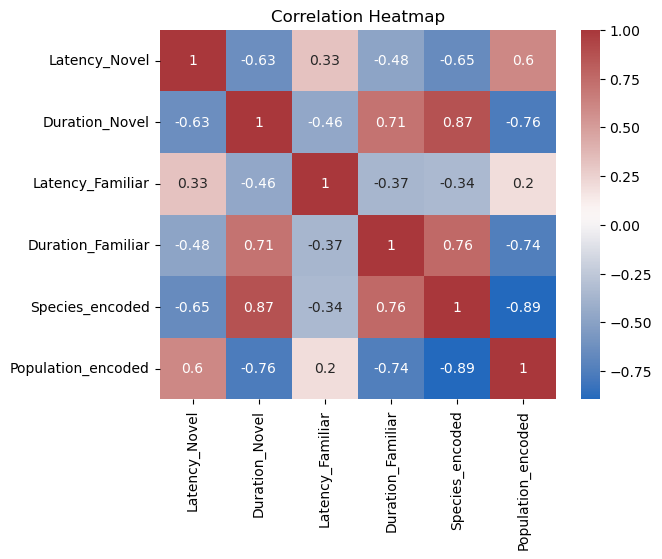

In [3]:
### Correlation analysis

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# encode non-numerical columns
label_encoder = LabelEncoder()
soc_rec_clean['Species_encoded'] = label_encoder.fit_transform(soc_rec_clean['Species'])
soc_rec_clean['Population_encoded'] = label_encoder.fit_transform(soc_rec_clean['Population'])

numeric_cols = soc_rec_clean.select_dtypes(include=['number'])  # select only numeric columns

# calculate correlation matrix
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
### Compare the behaviour of the two mouse species

soc_rec_clean.groupby("Species").mean(numeric_only = True) # compare the mean values of each species

,Latency_Novel,Duration_Novel,Latency_Familiar,Duration_Familiar,Species_encoded,Population_encoded
Species,,,,,,
R. d. chakae,9.583333,10.870833,6.625,21.233333,0.0,2.5
R. pumilio,4.458333,57.772500,4.500,65.234583,1.0,0.5


In [5]:
# Assess normality of data

from scipy.stats import shapiro

def check_normality(df, columns):
    results = []
    for col in columns:
        stat, p = shapiro(df[col].dropna())  # drop missing values
        results.append({
            'Variable': col,
            'Shapiro-Wilk Test Statistic': stat,
            'P-value': p,
            'Normality': 'Yes' if p > 0.05 else 'No'
        })
    return pd.DataFrame(results)

# select only numeric columns
numeric_columns = soc_rec_clean.select_dtypes(include=['float64', 'int64']).columns

# check normality
normality_results = check_normality(soc_rec_clean, numeric_columns)

print(normality_results)


            Variable  Shapiro-Wilk Test Statistic   P-value Normality
0      Latency_Novel                     0.920611  0.003124        No
1     Duration_Novel                     0.908269  0.001176        No
2   Latency_Familiar                     0.878850  0.000140        No
3  Duration_Familiar                     0.912023  0.001574        No


In [6]:
# Use a non-parametric (Mann Whitney U) test to analyse the difference between the two species in duration of novel interactions
from scipy.stats import mannwhitneyu

# filter data for each species
pumilio_novel = soc_rec_clean[soc_rec_clean['Species'] == 'R. pumilio']['Duration_Novel']
chakae_novel = soc_rec_clean[soc_rec_clean['Species'] == 'R. d. chakae']['Duration_Novel']


# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(pumilio_novel, chakae_novel, alternative='two-sided')

print(f"Mann-Whitney U test [Duration: Species Difference - Novel]:")
print(f"U-statistic: {u_stat}, P-value: {p_val}")

Mann-Whitney U test [Duration: Species Difference - Novel]:
U-statistic: 573.0, P-value: 4.388546107681795e-09


In [7]:
# Use a non-parametric (Mann Whitney U) test to analyse the difference between the two species in duration of familiar interactions

# filter data for each species
pumilio_familiar = soc_rec_clean[soc_rec_clean['Species'] == 'R. pumilio']['Duration_Familiar']
chakae_familiar = soc_rec_clean[soc_rec_clean['Species'] == 'R. d. chakae']['Duration_Familiar']


# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(pumilio_familiar, chakae_familiar, alternative='two-sided')

print(f"Mann-Whitney U test [Duration: Species Difference - Familiar]:")
print(f"U-statistic: {u_stat}, P-value: {p_val}")

Mann-Whitney U test [Duration: Species Difference - Familiar]:
U-statistic: 549.5, P-value: 7.30582408959472e-08


In [8]:
# Use a t-test to analyse the difference between the two species in duration of novel interactions

from scipy.stats import ttest_ind

# filter data for each species
pumilio_novel = soc_rec_clean[soc_rec_clean['Species'] == 'R. pumilio']['Duration_Novel']
chakae_novel = soc_rec_clean[soc_rec_clean['Species'] == 'R. d. chakae']['Duration_Novel']

# perform the t-test
t_stat_species_novel, p_val_species_novel = ttest_ind(pumilio_novel, chakae_novel, nan_policy='omit')

print(f"T-test for duration (Novel) between species:")
print(f"T-stat: {t_stat_species_novel}, P-value: {p_val_species_novel}")



T-test for duration (Novel) between species:
T-stat: 11.864047408980868, P-value: 1.3515435917190025e-15


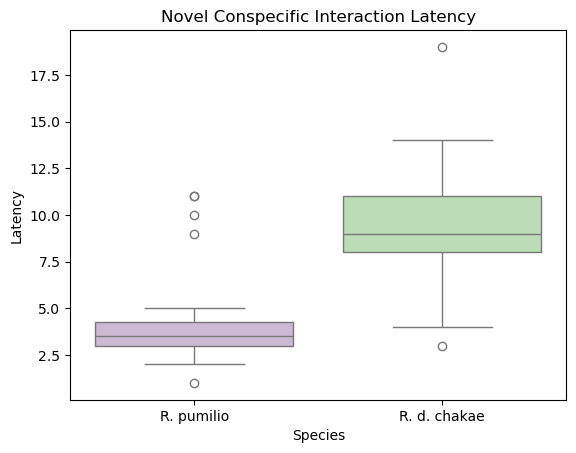

In [9]:
# Visualise the difference in latency (novel condition) between the species

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Species", y="Latency_Novel", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Latency")
plt.title("Novel Conspecific Interaction Latency") 

plt.show()


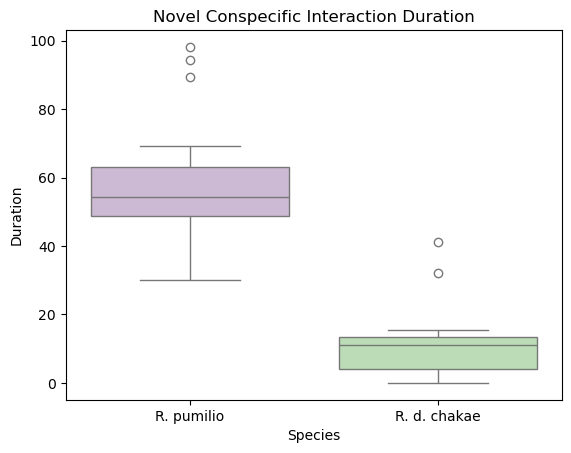

In [10]:
# Visualise the difference in duration (novel condition) between the species

sns.boxplot(x="Species", y="Duration_Novel", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Duration")
plt.title("Novel Conspecific Interaction Duration")
plt.show()

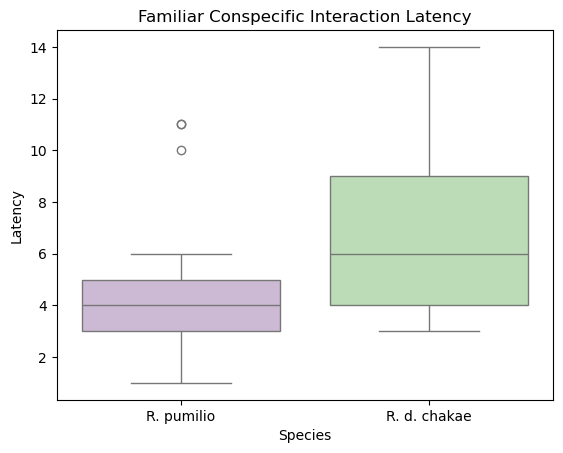

In [11]:
# Visualise the difference in latency (familiar condition) between the species
sns.boxplot(x="Species", y="Latency_Familiar", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Latency")
plt.title("Familiar Conspecific Interaction Latency")
plt.show()

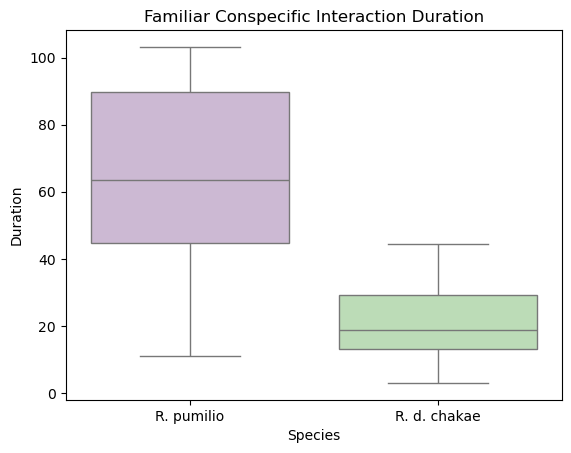

In [12]:
# Visualise the difference in duration (familiar condition) between the species
sns.boxplot(x="Species", y="Duration_Familiar", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Duration")
plt.title("Familiar Conspecific Interaction Duration")
plt.show()

In [13]:
# Data not normally distributed: use a non-parametric test (Mann Whitney U Test) to compare novel vs familiar durations

# extract the data
novel_durations = soc_rec_clean['Duration_Novel']
familiar_durations = soc_rec_clean['Duration_Familiar']

# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(novel_durations, familiar_durations, alternative='two-sided')

print(f"Mann-Whitney U test [Duration: Novel/Familiar]:")
print(f"U-statistic: {u_stat}, P-value: {p_val}")


Mann-Whitney U test [Duration: Novel/Familiar]:
U-statistic: 921.5, P-value: 0.09185951659921766


In [14]:
# Mann Whitney U Test for difference in latency between novel and familiar paradigms

# extract the data
novel_latency = soc_rec_clean['Latency_Novel']
familiar_latency = soc_rec_clean['Latency_Familiar']

# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(novel_latency, familiar_latency, alternative='two-sided')

print(f"Mann-Whitney U test [Latency: Novel/Familiar]:")
print(f"U-statistic: {u_stat}, P-value: {p_val}")


Mann-Whitney U test [Latency: Novel/Familiar]:
U-statistic: 1353.5, P-value: 0.13708263739903326


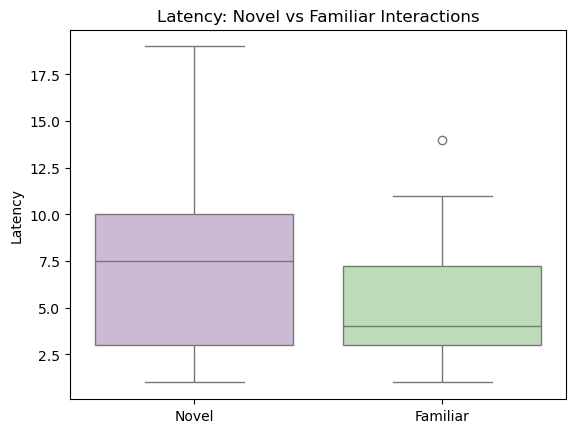

In [15]:
# Visualise latency between novel and familiar conditions


latency_nov = soc_rec_clean["Latency_Novel"]
latency_fam = soc_rec_clean["Latency_Familiar"]


sns.boxplot(data=[latency_nov, latency_fam], palette="PRGn")
plt.xticks([0, 1], ["Novel", "Familiar"])
plt.title("Latency: Novel vs Familiar Interactions")
plt.ylabel("Latency")

plt.show()

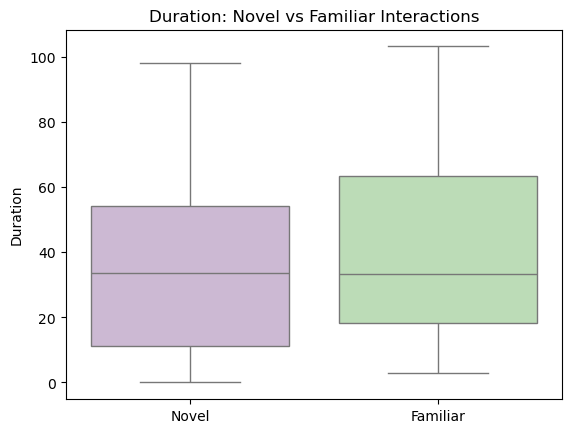

In [16]:
# Compare duration between novel and familiar conditions


duration_nov = soc_rec_clean["Duration_Novel"]
duration_fam = soc_rec_clean["Duration_Familiar"]


sns.boxplot(data=[duration_nov, duration_fam], palette="PRGn")
plt.xticks([0, 1], ["Novel", "Familiar"])
plt.title("Duration: Novel vs Familiar Interactions")
plt.ylabel("Duration")

plt.show()


In [17]:
### Compare populations of mice
# Data was not normally distributed so use non-parametric test
# Kruskal-Wallis test loop function

from scipy.stats import kruskal

# Define reusable function
def test_kruskal_wallis(df, group_col, test_cols):
  
    results = []
    populations = df[group_col].unique()
    
    for col in test_cols:
        # Extract data groups for the given column
        data_groups = [df[df[group_col] == pop][col].dropna() for pop in populations]
        
        # Perform Kruskal-Wallis test
        h_stat, p_val = kruskal(*data_groups)
        
        # Append results
        results.append({'Variable': col, 'H-statistic': h_stat, 'P-value': p_val})
    
    return pd.DataFrame(results)

# Specify the test columns
test_columns = ['Duration_Novel', 'Latency_Familiar', 'Duration_Familiar', 'Latency_Novel']

# Perform the Kruskal-Wallis test
results = test_kruskal_wallis(soc_rec_clean, group_col='Population', test_cols=test_columns)

# Display results
print(results)

            Variable  H-statistic       P-value
0     Duration_Novel    34.707863  1.404266e-07
1   Latency_Familiar     9.893234  1.949583e-02
2  Duration_Familiar    30.754938  9.572749e-07
3      Latency_Novel    18.892297  2.877817e-04


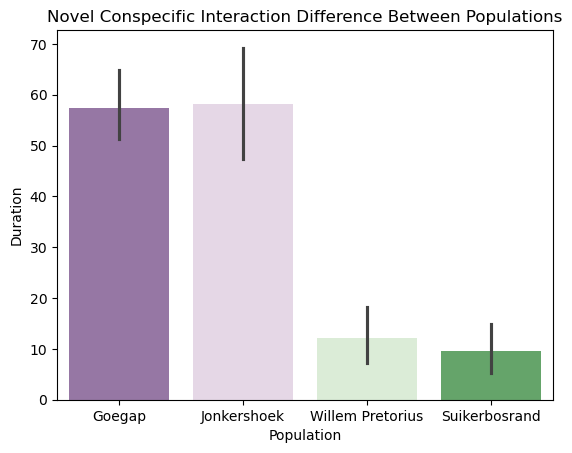

In [18]:
# Visualise novel paradigm duration values between populations
sns.barplot(x="Population", y="Duration_Novel", data=soc_rec_clean, palette='PRGn', hue="Population", legend=False)
plt.ylabel("Duration") 
plt.title("Novel Conspecific Interaction Difference Between Populations") # add title
plt.show()

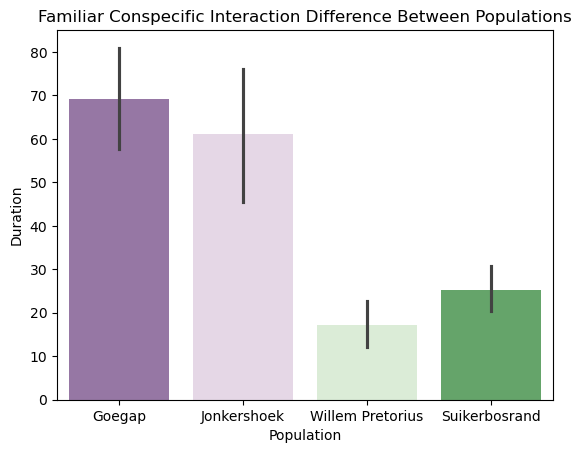

In [19]:
# Visualise familiar paradigm values between populations

sns.barplot(x="Population", y="Duration_Familiar", data=soc_rec_clean, palette='PRGn', hue="Population", legend=False)
plt.ylabel("Duration") # change y axis label
plt.title("Familiar Conspecific Interaction Difference Between Populations") # add title
plt.show()
